## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.268178  0.000402  1.726526 -1.163305  0.575290  0.098571
1 -1.124945 -1.233902  0.457461  0.285674 -1.321402 -1.603832
2 -0.157940  1.001590 -1.278621 -0.636195 -0.334038  0.512140
3  1.246634  0.770013 -0.835621  0.646242 -1.466111  0.787237
4  0.984832 -0.210374 -0.772293  1.143751  1.108962  1.719579


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0004939	total: 46.8ms	remaining: 46.8s
1:	learn: 0.9904604	total: 47.2ms	remaining: 23.5s
2:	learn: 0.9803423	total: 47.5ms	remaining: 15.8s
3:	learn: 0.9700515	total: 47.9ms	remaining: 11.9s
4:	learn: 0.9605900	total: 48.3ms	remaining: 9.61s
5:	learn: 0.9494560	total: 48.6ms	remaining: 8.05s
6:	learn: 0.9372695	total: 48.9ms	remaining: 6.94s
7:	learn: 0.9283101	total: 49.3ms	remaining: 6.11s
8:	learn: 0.9180809	total: 49.6ms	remaining: 5.46s
9:	learn: 0.9100432	total: 50ms	remaining: 4.95s
10:	learn: 0.9004250	total: 50.3ms	remaining: 4.52s
11:	learn: 0.8899622	total: 50.7ms	remaining: 4.17s
12:	learn: 0.8803836	total: 51ms	remaining: 3.87s
13:	learn: 0.8719773	total: 51.3ms	remaining: 3.62s
14:	learn: 0.8638458	total: 51.6ms	remaining: 3.39s
15:	learn: 0.8552733	total: 52ms	remaining: 3.2s
16:	learn: 0.8463218	total: 52.3ms	remaining: 3.03s
17:	learn: 0.8380193	total: 52.7ms	remaining: 2.87s
18:	learn: 0.8291492	total: 53ms	remaining: 2.74s
1

217:	learn: 0.1512982	total: 123ms	remaining: 442ms
218:	learn: 0.1501663	total: 124ms	remaining: 441ms
219:	learn: 0.1490261	total: 124ms	remaining: 440ms
220:	learn: 0.1478202	total: 124ms	remaining: 439ms
221:	learn: 0.1466793	total: 125ms	remaining: 437ms
222:	learn: 0.1454438	total: 125ms	remaining: 436ms
223:	learn: 0.1441931	total: 126ms	remaining: 435ms
224:	learn: 0.1430792	total: 126ms	remaining: 434ms
225:	learn: 0.1421713	total: 126ms	remaining: 433ms
226:	learn: 0.1411830	total: 127ms	remaining: 432ms
227:	learn: 0.1399893	total: 127ms	remaining: 431ms
228:	learn: 0.1388325	total: 128ms	remaining: 430ms
229:	learn: 0.1378284	total: 128ms	remaining: 429ms
230:	learn: 0.1368182	total: 128ms	remaining: 427ms
231:	learn: 0.1357848	total: 129ms	remaining: 426ms
232:	learn: 0.1347280	total: 129ms	remaining: 425ms
233:	learn: 0.1336957	total: 129ms	remaining: 424ms
234:	learn: 0.1326756	total: 130ms	remaining: 422ms
235:	learn: 0.1319029	total: 130ms	remaining: 421ms
236:	learn: 

500:	learn: 0.0334843	total: 226ms	remaining: 225ms
501:	learn: 0.0332660	total: 227ms	remaining: 225ms
502:	learn: 0.0330577	total: 227ms	remaining: 224ms
503:	learn: 0.0328608	total: 227ms	remaining: 224ms
504:	learn: 0.0326488	total: 228ms	remaining: 223ms
505:	learn: 0.0324473	total: 228ms	remaining: 223ms
506:	learn: 0.0323104	total: 228ms	remaining: 222ms
507:	learn: 0.0321324	total: 229ms	remaining: 222ms
508:	learn: 0.0319370	total: 229ms	remaining: 221ms
509:	learn: 0.0318039	total: 229ms	remaining: 220ms
510:	learn: 0.0316029	total: 230ms	remaining: 220ms
511:	learn: 0.0314134	total: 230ms	remaining: 219ms
512:	learn: 0.0312307	total: 231ms	remaining: 219ms
513:	learn: 0.0310604	total: 231ms	remaining: 218ms
514:	learn: 0.0308718	total: 231ms	remaining: 218ms
515:	learn: 0.0306878	total: 232ms	remaining: 217ms
516:	learn: 0.0305247	total: 232ms	remaining: 217ms
517:	learn: 0.0303238	total: 232ms	remaining: 216ms
518:	learn: 0.0301458	total: 233ms	remaining: 216ms
519:	learn: 

789:	learn: 0.0099272	total: 329ms	remaining: 87.5ms
790:	learn: 0.0098863	total: 330ms	remaining: 87.1ms
791:	learn: 0.0098508	total: 330ms	remaining: 86.6ms
792:	learn: 0.0097978	total: 330ms	remaining: 86.2ms
793:	learn: 0.0097725	total: 331ms	remaining: 85.8ms
794:	learn: 0.0097382	total: 331ms	remaining: 85.4ms
795:	learn: 0.0097176	total: 332ms	remaining: 85ms
796:	learn: 0.0096694	total: 332ms	remaining: 84.6ms
797:	learn: 0.0096339	total: 332ms	remaining: 84.1ms
798:	learn: 0.0095918	total: 333ms	remaining: 83.7ms
799:	learn: 0.0095574	total: 333ms	remaining: 83.3ms
800:	learn: 0.0095163	total: 333ms	remaining: 82.8ms
801:	learn: 0.0094717	total: 334ms	remaining: 82.4ms
802:	learn: 0.0094221	total: 334ms	remaining: 82ms
803:	learn: 0.0093755	total: 335ms	remaining: 81.6ms
804:	learn: 0.0093402	total: 335ms	remaining: 81.2ms
805:	learn: 0.0092863	total: 335ms	remaining: 80.7ms
806:	learn: 0.0092416	total: 336ms	remaining: 80.3ms
807:	learn: 0.0092262	total: 336ms	remaining: 79.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

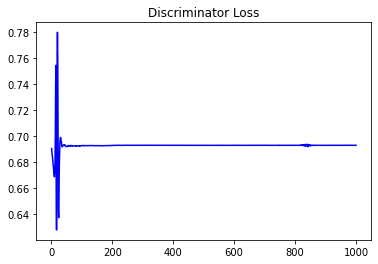

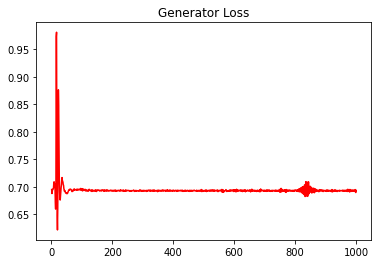

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12366175519602976


#### Sanity Checks 

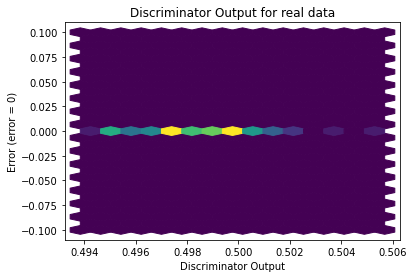

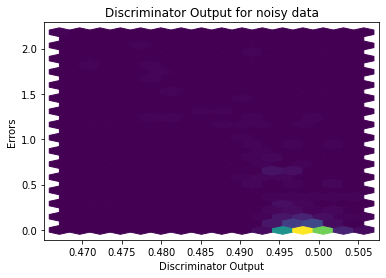

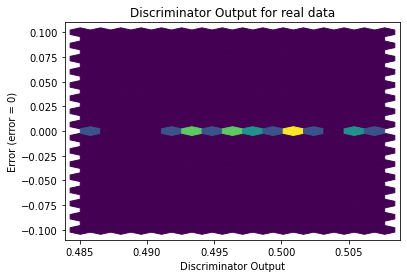

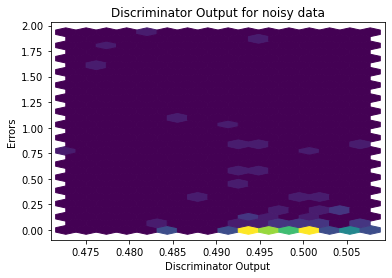

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


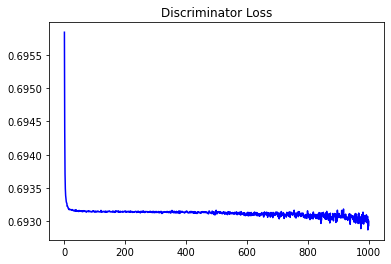

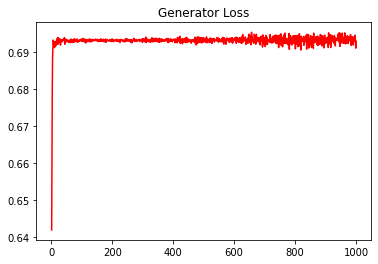

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1642213783692624


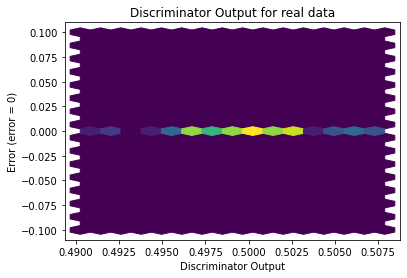

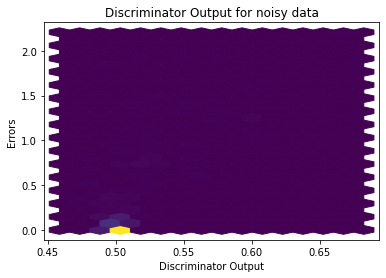

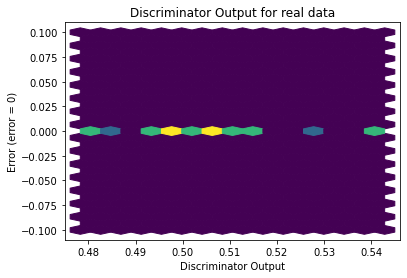

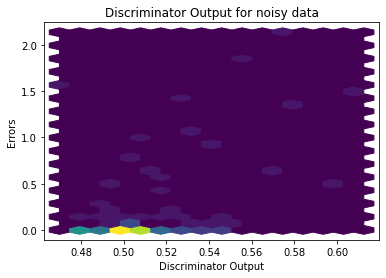

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
